In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix


Dataset for homework - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

For homework, we will use only 6 most important features. That would be sufficient.

In [3]:
df = pd.read_csv('creditcard.csv').drop(['Time'], axis=1)

In [4]:
df.drop_duplicates().Class.value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [4]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [39]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Feature importances

   feature  importance
0      V10    0.154809
1      V14    0.139288
2       V4    0.128538
3      V12    0.102290
4      V11    0.086573
5      V17    0.073107
6       V3    0.053273
7       V7    0.046660
8      V16    0.038420
9       V2    0.019026
10     V21    0.018972
11      V9    0.011651
12     V19    0.010332
13  Amount    0.009658
14     V18    0.009561
15     V28    0.009482
16     V20    0.009241
17      V6    0.008451
18     V26    0.007858
19     V13    0.007664
20     V27    0.007551
21      V5    0.007115
22     V15    0.006927
23      V8    0.006737
24     V25    0.005903
25     V22    0.005713
26      V1    0.005487
27     V24    0.005262
28     V23    0.004450


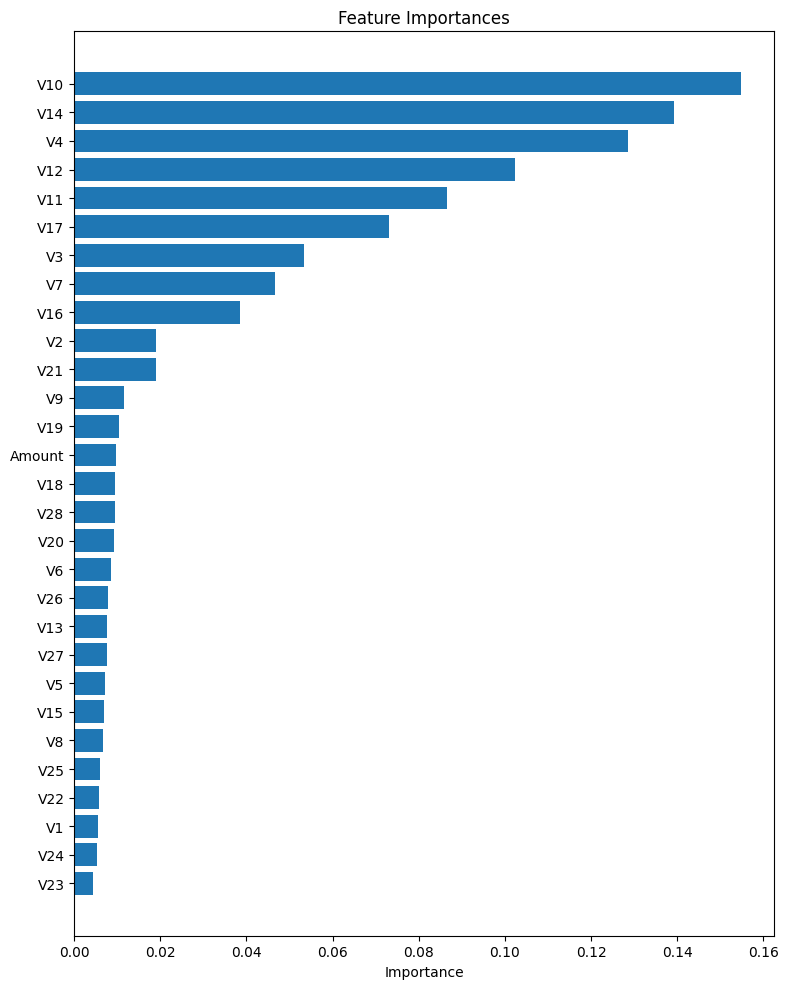

In [6]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

print(feat_imp)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [5]:
features = ['V10','V14','V4','V12', 'V11', 'V17', 'Class']

In [6]:
df = df[features].copy(deep=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V10     284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V12     284807 non-null  float64
 4   V11     284807 non-null  float64
 5   V17     284807 non-null  float64
 6   Class   284807 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


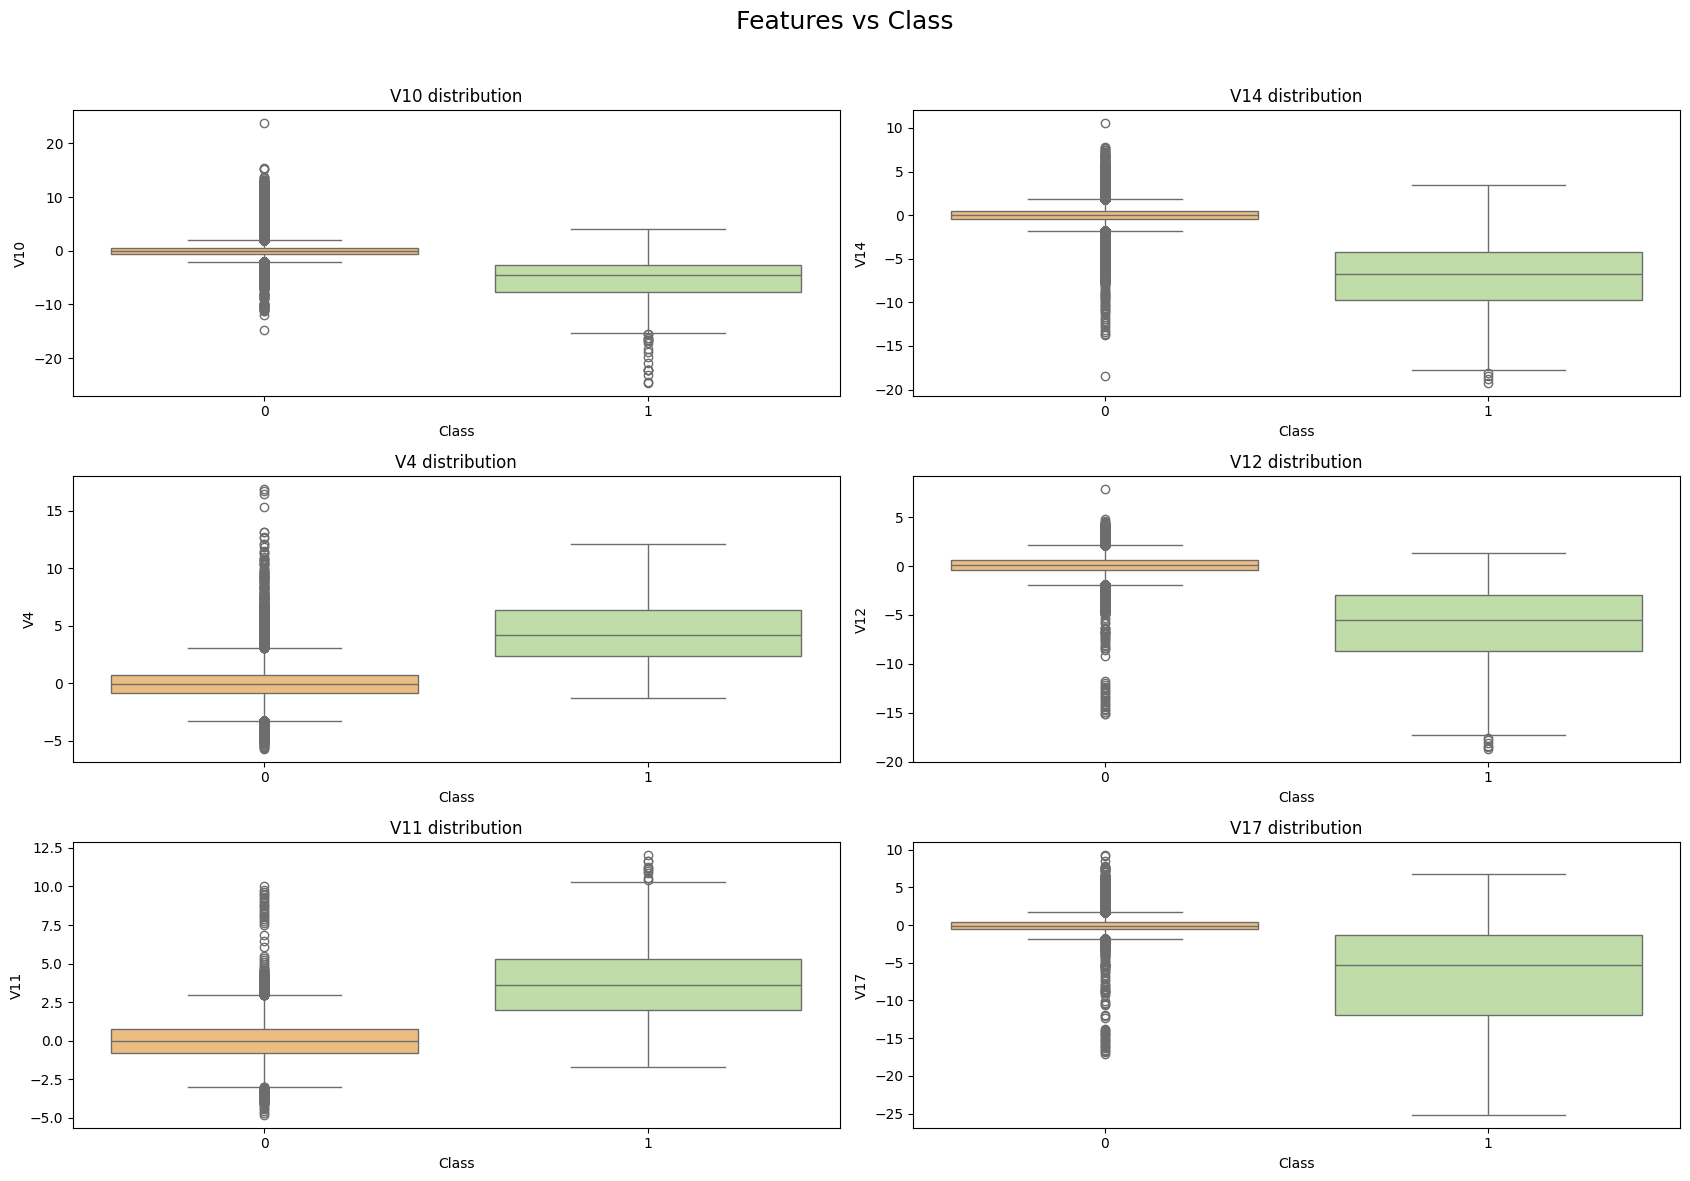

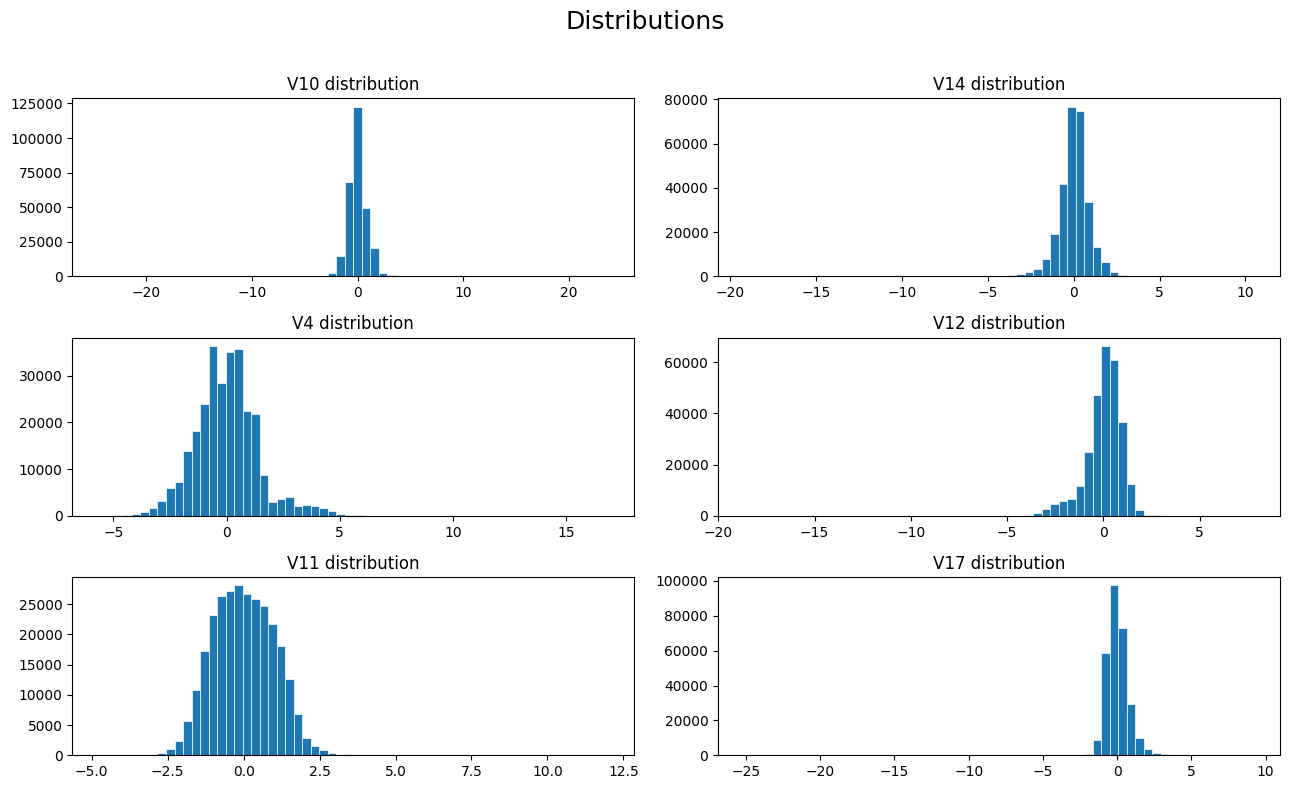

In [11]:
fig, axes = plt.subplots(3,2, figsize=(17, 12))
fig.suptitle('Features vs Class', size=18)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(
        ax=ax,
        data=df,
        x='Class',
        y=feat,
        hue='Class',
        palette='Spectral',
        dodge=False
    )
    ax.set_title(f"{feat} distribution")
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions\n', size=18)

for ax, feat in zip(axes.flatten(), features):
    ax.hist(df[feat], bins=60, linewidth=0.5, edgecolor='white')
    ax.set_title(f"{feat} distribution")

plt.tight_layout()

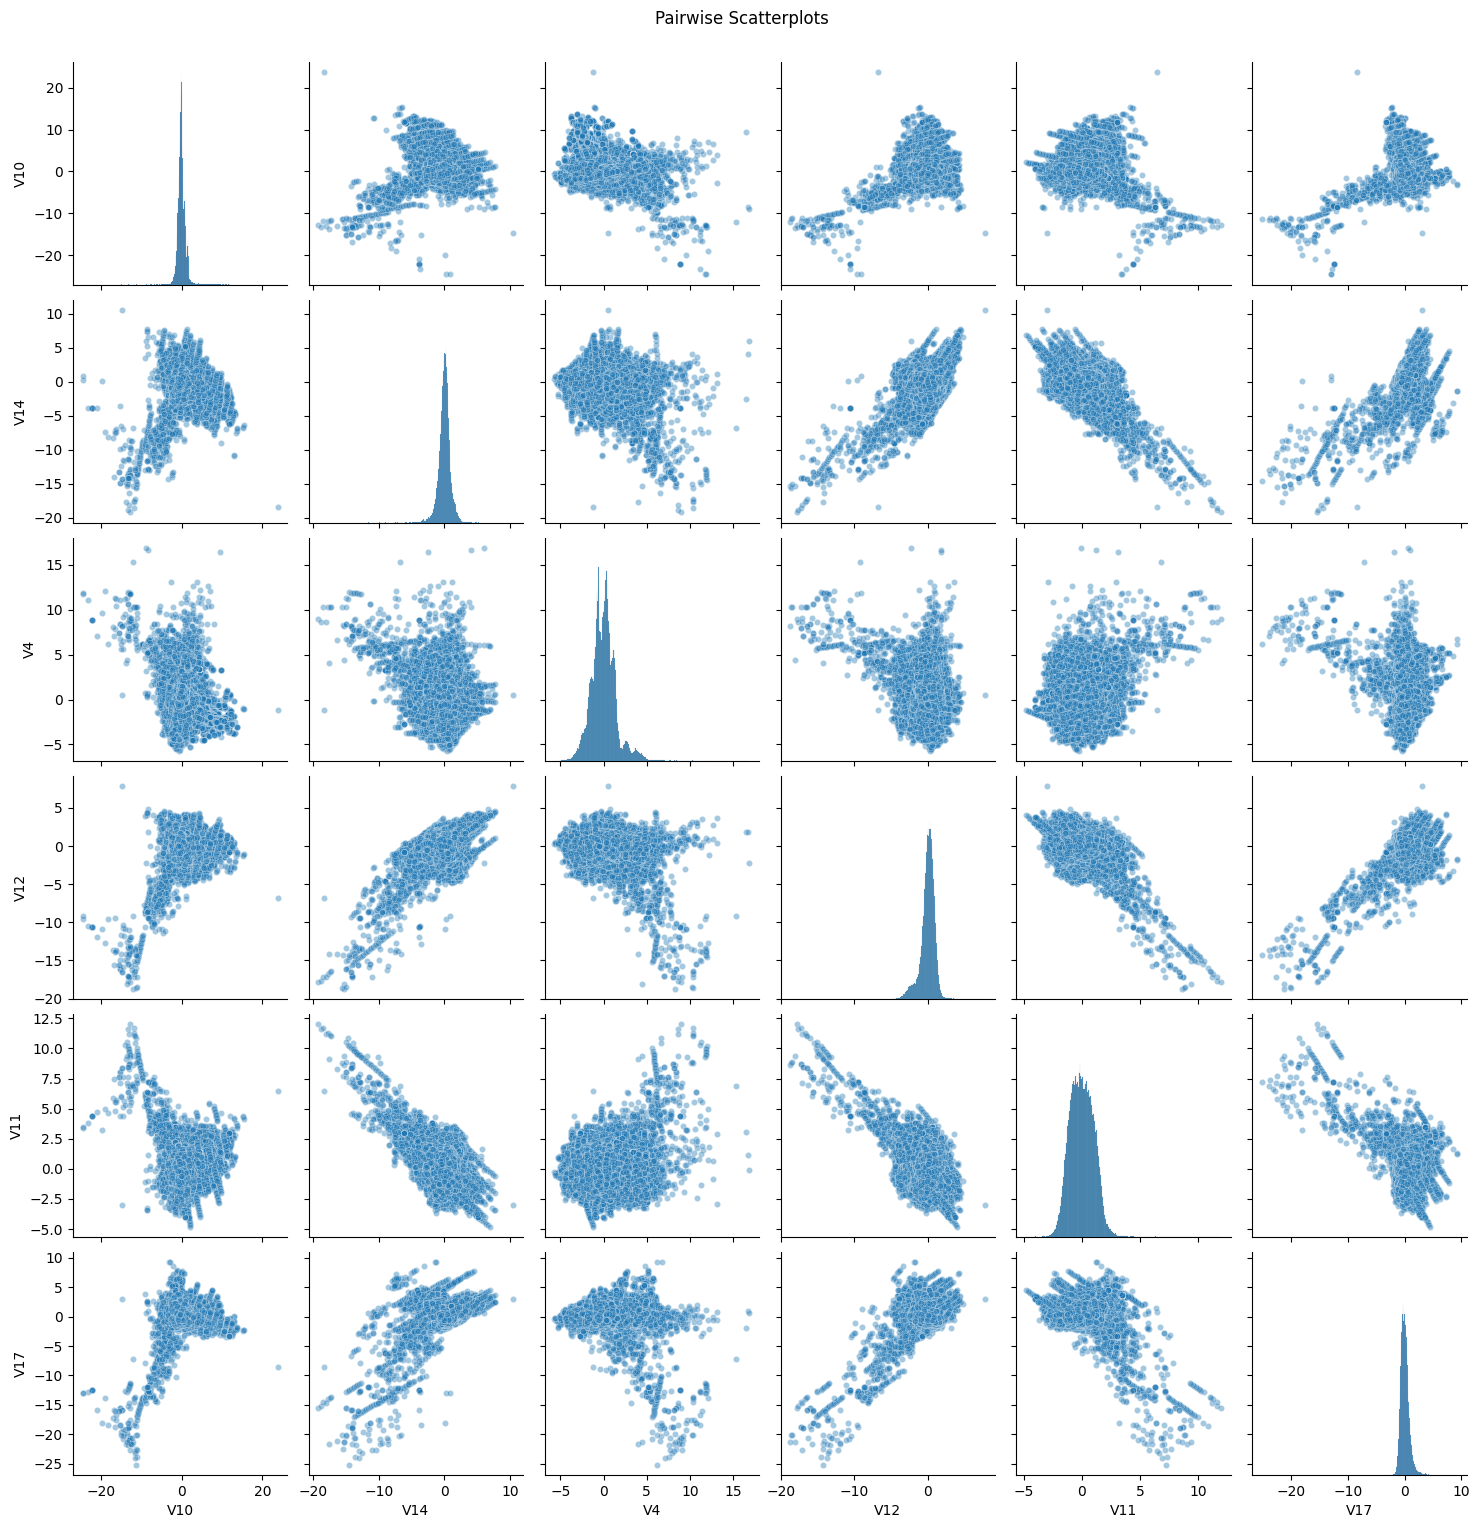

In [12]:
features = ['V10','V14','V4','V12', 'V11','V17']

sns.pairplot(df[features], diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

In [7]:
def IQR_method(df,n,features, k=1.5):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = k * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [8]:
# Detect anomalies via IQR method
outlier_indices = IQR_method(df, n=1, features=features, k=4.5)

# # Prepare a plotting DataFrame with an 'anomaly' flag
df_out = df[features].copy()
df_out['anomaly'] = 'normal'
df_out.loc[outlier_indices, 'anomaly'] = 'outlier'

Total number of outliers is: 492


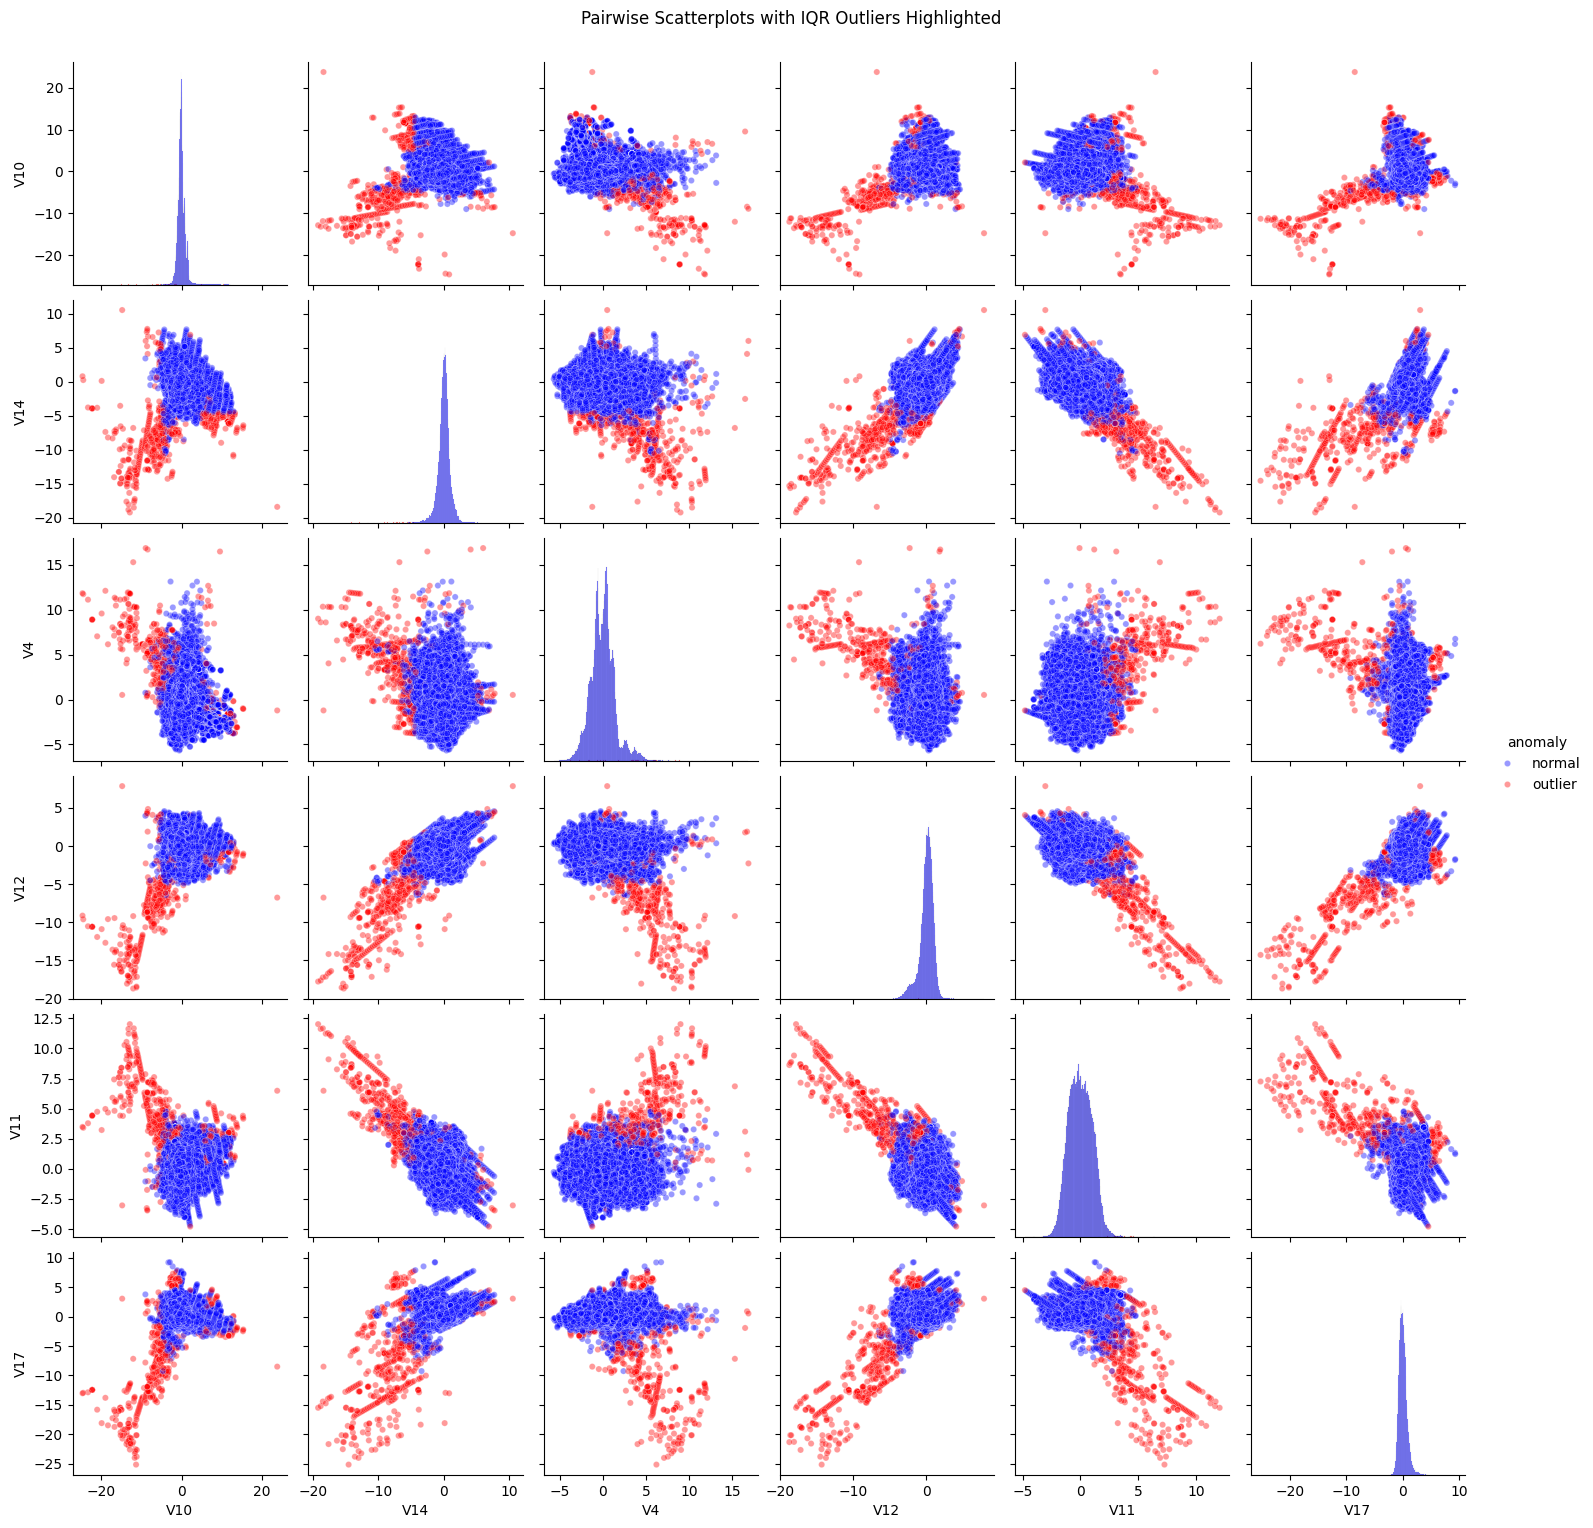

In [25]:
# Pairplot with anomalies highlighted
sns.pairplot(
    df_out,
    vars=features,
    hue='anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
plt.show()

In [9]:
df_out

,V10,V14,V4,V12,V11,V17,Class,anomaly
0,0.090794,-0.311169,1.378155,-0.617801,-0.551600,0.207971,0,normal
1,-0.166974,-0.143772,0.448154,1.065235,1.612727,-0.114805,0,normal
2,0.207643,-0.165946,0.379780,0.066084,0.624501,1.109969,0,normal
3,-0.054952,-0.287924,-0.863291,0.178228,-0.226487,-0.684093,0,normal
4,0.753074,-1.119670,0.403034,0.538196,-0.822843,-0.237033,0,normal
...,...,...,...,...,...,...,...,...
284802,4.356170,4.626942,-2.066656,2.711941,-1.593105,1.991691,0,normal
284803,-0.975926,-0.675143,-0.738589,0.915802,-0.150189,-0.025693,0,normal
284804,-0.484782,-0.510602,-0.557828,0.063119,0.411614,0.313502,0,normal
284805,-0.399126,0.449624,0.689799,-0.962886,-1.933849,0.509928,0,normal


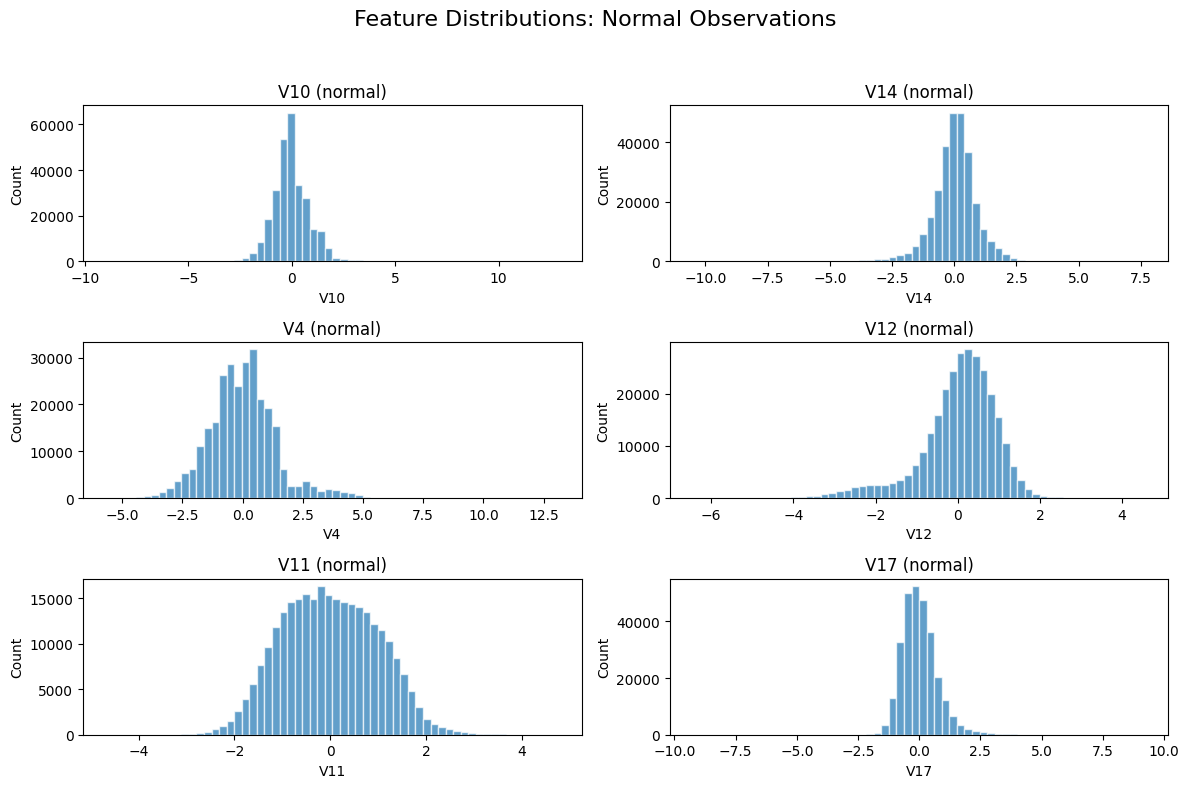

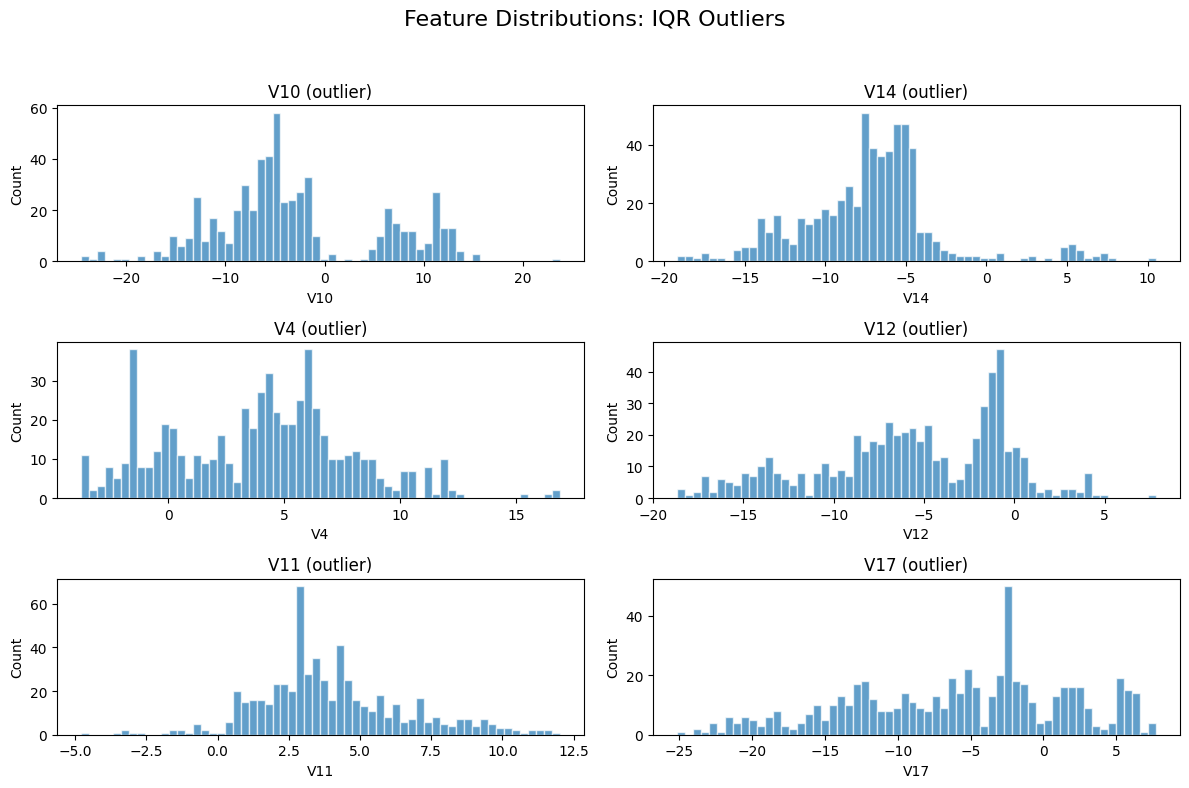

In [28]:
df_norm = df_out[df_out['anomaly'] == 'normal']
df_outlier  = df_out[df_out['anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: IQR Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [9]:
# Evaluate how well IQR outliers correspond to actual frauds
# Treat IQR outlier=1 as "predicted fraud", normal=0 as "predicted non‑fraud"
df_out['pred_iqr'] = 0
df_out.loc[outlier_indices, 'pred_iqr'] = 1

y_true = df['Class']
y_pred = df_out['pred_iqr']

print("=== IQR Outlier Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non‑fraud','fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_out = pd.DataFrame(cm,
                     index=['true_non‑fraud','true_fraud'],
                     columns=['pred_non‑fraud','pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_out)

=== IQR Outlier Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.60      0.82      0.69       492

    accuracy                           1.00    284807
   macro avg       0.80      0.91      0.85    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284045         270
true_fraud                  87         405


---

### Homework: Although we have managed to catch most of the frauds using a fairly simple IQR method, we still can improve the results. Try to do the same outlier/anomaly detection, but with more powerful methods and evaluate how much the metrics have improved/worsened.
I suggest you test these approaches:
- EllipticEnvelope
- IsolationForest
- LOF
- DBSCAN
- OneClassSVM
- etc.

Compare their results and draw some conclusions based on them.

In [10]:
outlier_fraction = len(df[df['Class'] == 1])/float(len(df[df['Class'] == 0]))
outlier_fraction

0.0017304750013189597

In [14]:
df.head()

,V10,V14,V4,V12,V11,V17,Class
0,0.090794,-0.311169,1.378155,-0.617801,-0.551600,0.207971,0
1,-0.166974,-0.143772,0.448154,1.065235,1.612727,-0.114805,0
2,0.207643,-0.165946,0.379780,0.066084,0.624501,1.109969,0
3,-0.054952,-0.287924,-0.863291,0.178228,-0.226487,-0.684093,0
4,0.753074,-1.119670,0.403034,0.538196,-0.822843,-0.237033,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V10     284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V12     284807 non-null  float64
 4   V11     284807 non-null  float64
 5   V17     284807 non-null  float64
 6   Class   284807 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


In [11]:
X_features = df.drop(columns=['Class'])
y_true = df['Class']

In [15]:
y_true

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [12]:
X_scaled = StandardScaler().fit_transform(X_features)

In [13]:
def check_outliers(model, X_scaled, y_true, model_name):
    y_pred = model.fit_predict(X_scaled)
    y_pred = np.where(y_pred == -1, 1, 0)
    print(f"=== {model_name} vs. True Fraud Labels ===")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['non‑fraud','fraud']))

    cm = confusion_matrix(y_true, y_pred)
    cm_df_out = pd.DataFrame(cm,
                        index=['true_non‑fraud','true_fraud'],
                        columns=['pred_non‑fraud','pred_fraud'])
    print("\nConfusion Matrix:")
    print(cm_df_out)

In [74]:
isolation_forest = IsolationForest(n_estimators=50, contamination=0.002, random_state=42)
check_outliers(isolation_forest, X_scaled, y_true, "Isolation Forest")

=== Isolation Forest vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.58      0.68      0.63       492

    accuracy                           1.00    284807
   macro avg       0.79      0.84      0.81    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284078         237
true_fraud                 159         333


In [75]:
elliptic_envelope = EllipticEnvelope(contamination=0.002, random_state=42)
check_outliers(elliptic_envelope, X_scaled, y_true, "Elliptic Envelope")

=== Elliptic Envelope vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.59      0.69      0.64       492

    accuracy                           1.00    284807
   macro avg       0.80      0.84      0.82    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284083         232
true_fraud                 154         338


In [31]:
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.001)
check_outliers(lof, X_scaled, y_true, "Local Outlier Factor")

d:\Projects\pyProjects\data-camp-hometasks\.venv\lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


=== Local Outlier Factor vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284030         285
true_fraud                 492           0


In [33]:
# Sample a subset of the data
indices = np.random.choice(len(X_scaled), 50000, replace=False)
X_sample = X_scaled[indices]
y_sample = y_true.iloc[indices]

In [32]:
dbscan = DBSCAN(eps=0.8, min_samples=8)
check_outliers(dbscan, X_sample, y_sample, "DBSCAN")

=== DBSCAN vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      0.86      0.93      9974
       fraud       0.02      0.85      0.03        26

    accuracy                           0.86     10000
   macro avg       0.51      0.85      0.48     10000
weighted avg       1.00      0.86      0.92     10000


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud            8608        1366
true_fraud                   4          22


In [27]:
svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.017)
check_outliers(svm, X_scaled, y_true, "One-Class SVM")

=== One-Class SVM vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      0.98      0.99    284315
       fraud       0.09      0.87      0.16       492

    accuracy                           0.98    284807
   macro avg       0.54      0.93      0.58    284807
weighted avg       1.00      0.98      0.99    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          279883        4432
true_fraud                  66         426
